## Imports

### Install font and other packages

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,848 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [2]:
pip install git+https://github.com/quantopian/pyfolio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-uu_o56vh
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-uu_o56vh
     |████████████████████████████████| 52 kB 1.2 MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75774 sha256=c8826a90b6c870262fce0dbc7b76f7d1050882bee5842619ead2703c1474cf16
  Stored in directory: /tmp/pip-ephem-wheel-cache-avp4326p/wheels/2d/aa/24/c99ed55ef37c69e33815248c1622cdb81b65ec753868004c28
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39780 sha256=e9462bd9f65aeb532e2e49daf519c9cf1d85d555d856bfe4be505b503e52cf2e
  Stored in directory: /root/.cache/pip/wheels/d9/91/4b/654fcff57477efcf149eaca236da2fce991526cbab431bf312
Successfully built pyfolio empyrical


In [15]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import Packages

In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from sklearn.model_selection import train_test_split

import pandas_datareader.naver as web_naver
import FinanceDataReader as fdr

In [2]:
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
idx = pd.IndexSlice

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)
np.random.seed(42)

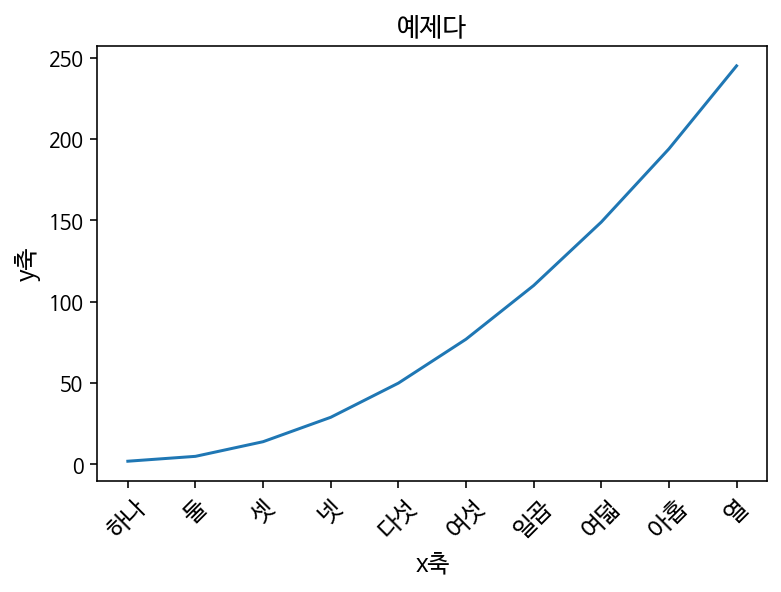

In [3]:
plt.plot([x for x in range(0, 10)], [(3*y**2)+2 for y in range(0, 10)])
plt.title("예제다", fontsize= 13)
plt.xlabel("x축", fontsize= 12)
plt.xticks(np.arange(0, 10, 1), ['하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '열'], fontsize= 12, rotation= 45)
plt.ylabel("y축", fontsize= 12)
plt.show()

### Import data

In [4]:
krx100 = pd.read_csv('KRX100.csv', encoding='cp949')
krx100.head()

,종목코드,종목명,종가,대비,등락률,상장시가총액
0,5930,삼성전자,60000,2500,4.35,358186953.0
1,373220,LG에너지솔루션,400000,500,0.13,93600000.0
2,660,SK하이닉스,98700,4700,5.00,71853833.0
3,207940,삼성바이오로직스,817000,-8000,-0.97,58149158.0
4,5380,현대차,183500,1000,0.55,39208112.0


In [5]:
krx300 = pd.read_csv('KRX300.csv', encoding='cp949')
krx300.head()

,종목코드,종목명,종가,대비,등락률,상장시가총액
0,5930,삼성전자,60000,2500,4.35,358186953.0
1,660,SK하이닉스,98700,4700,5.00,71853833.0
2,207940,삼성바이오로직스,817000,-8000,-0.97,58149158.0
3,5380,현대차,183500,1000,0.55,39208112.0
4,35420,NAVER,231000,-2500,-1.07,37895339.0


In [6]:
kospi200 = pd.read_csv('KOSPI200.csv', encoding='cp949')
kospi200.head()

,종목코드,종목명,종가,대비,등락률,상장시가총액
0,5930,삼성전자,60000,2500,4.35,358186953.0
1,373220,LG에너지솔루션,400000,500,0.13,93600000.0
2,660,SK하이닉스,98700,4700,5.00,71853833.0
3,207940,삼성바이오로직스,817000,-8000,-0.97,58149158.0
4,5380,현대차,183500,1000,0.55,39208112.0


In [7]:
kosdaq150 = pd.read_csv('KOSDAQ150.csv', encoding='cp949')
kosdaq150.head()

,종목코드,종목명,종가,대비,등락률,상장시가총액
0,91990,셀트리온헬스케어,70500,-800,-1.12,11149919.0
1,247540,에코프로비엠,111500,-5500,-4.70,10904850.0
2,66970,엘앤에프,207500,-5500,-2.58,7455395.0
3,28300,HLB,42800,250,0.59,4574581.0
4,293490,카카오게임즈,49400,-2100,-4.08,3887740.0


In [8]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2022,6,30)
#dataset = pd.concat([kospi200, kosdaq150], axis=0)
#dataset = krx100
dataset = krx300

In [9]:
def import_price_data(start, end, dataset):
    dictionary = {}
    code_list = dataset['종목코드'].tolist()
    name_list = dataset['종목명'].tolist()
    for i in tqdm(range(len(code_list))):
        code = str(code_list[i]).zfill(6)
        name = name_list[i]
        df = web_naver.NaverDailyReader(symbols=code, start=start, end=end, adjust_price=True).read()
        adj_close = df.Close
        dictionary[name] = adj_close
    data = pd.DataFrame(dictionary)
    data = data.astype('float')
    return data

In [10]:
df = import_price_data(start, end, dataset)

100%|██████████| 300/300 [06:01<00:00,  1.21s/it]


In [11]:
# 5% 이상의 결측치가 존재하면 그 종목은 사용하지 않기로 한다.
def dropna_percent(percentage, dataset):
    print('결측치 존재 여부: ', dataset.isnull().values.any())
    missing_fraction = dataset.isnull().mean().sort_values(ascending=False)
    drop_list = sorted(list(missing_fraction[missing_fraction > percentage].index))
    new_df = dataset.drop(labels=drop_list, axis=1)
    print(f"제거한 column의 수는 {len(drop_list)}개 입니다.")
    return new_df

In [12]:
df = dropna_percent(0.05, df)

결측치 존재 여부:  True
제거한 column의 수는 92개 입니다.


In [13]:
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')
print(df.shape)
print('결측치 존재 여부: ', df.isnull().values.any())

(2584, 208)
결측치 존재 여부:  False


In [14]:
train = df[df.index <= '2020-01-20']
test = df[df.index > '2020-01-20']

## 업종별로 데이터 나누기

### 업종 데이터 가져오기 및 합치기(KRX기준)

In [17]:
df_krx = fdr.StockListing('KRX')

In [18]:
df_krx = df_krx[['Name', 'Sector']]

In [19]:
df_krx.head()

,Name,Sector
0,3S,전자부품 제조업
1,AJ네트웍스,산업용 기계 및 장비 임대업
2,AK홀딩스,기타 금융업
3,APS홀딩스,기타 금융업
4,AP시스템,특수 목적용 기계 제조업


In [20]:
column_df = pd.DataFrame(train.columns)
column_df.columns = ['Name']
column_df.head()

,Name
0,삼성전자
1,SK하이닉스
2,현대차
3,NAVER
4,삼성SDI


In [21]:
merged_df = pd.merge(column_df, df_krx, how='left', on='Name')
merged_df.head()

,Name,Sector
0,삼성전자,통신 및 방송 장비 제조업
1,SK하이닉스,반도체 제조업
2,현대차,자동차용 엔진 및 자동차 제조업
3,NAVER,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업"
4,삼성SDI,일차전지 및 축전지 제조업


In [22]:
merged_df.Sector.nunique()

69

In [23]:
merged_df.Sector.unique()

array(['통신 및 방송 장비 제조업', '반도체 제조업', '자동차용 엔진 및 자동차 제조업',
       '자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업', '일차전지 및 축전지 제조업',
       '기초 화학물질 제조업', '기초 의약물질 및 생물학적 제제 제조업', '자동차 신품 부품 제조업',
       '1차 철강 제조업', '기타 금융업', '석유 정제품 제조업', '전기업', '전기 통신업', '보험업',
       '담배 제조업', '일반 목적용 기계 제조업', '해상 운송업', '기타 화학제품 제조업', '전자부품 제조업',
       '항공 여객 운송업', '1차 비철금속 제조업', '내화, 비내화 요업제품 제조업', '소프트웨어 개발 및 공급업',
       '기타 운송관련 서비스업', '은행 및 저축기관', '기타 식품 제조업', '선박 및 보트 건조업',
       '유원지 및 기타 오락관련 서비스업', '항공기,우주선 및 부품 제조업', '그외 기타 개인 서비스업',
       '의약품 제조업', '토목 건설업', '건축기술, 엔지니어링 및 관련 기술 서비스업', '금융 지원 서비스업',
       '연료용 가스 제조 및 배관공급업', '시멘트, 석회, 플라스터 및 그 제품 제조업', '종합 소매업',
       '기타 상품 전문 소매업', '경비, 경호 및 탐정업', '음·식료품 및 담배 도매업', '광고업',
       '도로 화물 운송업', '의료용품 및 기타 의약 관련제품 제조업', '건물 건설업', '상품 중개업',
       '텔레비전 방송업', '오디오물 출판 및 원판 녹음업', '알코올음료 제조업', '상품 종합 도매업',
       '비알코올음료 및 얼음 제조업', '전기 및 통신 공사업', '생활용품 도매업',
       '전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업', '특수 목적용 기계 제조업',
       '기타 비금속 광물제품 제조업', '화학섬유 

### 업종 데이터 가져오기 및 합치기(네이버기준)

In [24]:
code_list = [288, 290, 332, 272, 287, 263,277, 331, 278, 283, 282, 269, 264, 296, 300, 318, 285, 313, 291, 299, 292, 321, 271, 304, 301, 320, 294, 317, 267, 337, 326, 334, 310, 336, 314, 308, 324, 338, 276, 274, 279, 322, 329, 25, 270, 312, 319, 284, 323, 298, 297, 311, 289, 330, 265, 273, 307, 302, 280, 306, 328, 327, 303, 268, 305, 293, 295, 315, 274, 325,266,309,333, 281,261, 286, 316, 339, 262, 275]
len(code_list)

80

In [25]:
sector_dict = {}
for code in tqdm(code_list):
  url = f"https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no={code}"
  result = pd.read_html(url, encoding='cp949')
  name = result[0].업종명.dropna().values[0][0]
  stock_list = result[2].종목명.dropna().values
  stock_list = [i.replace('*', '').strip() for i in stock_list]
  for stock in stock_list:
    sector_dict[stock] = name

100%|██████████| 80/80 [01:30<00:00,  1.13s/it]


In [26]:
sector_df = pd.DataFrame(train.columns)
sector_df.columns = ['Name']
sector_df.head()

,Name
0,삼성전자
1,SK하이닉스
2,현대차
3,NAVER
4,삼성SDI


In [27]:
sector_list = []
for i in sector_df.Name:
  try:
    sector_list.append(sector_dict[i])
  except:
    sector_list.append('unknown')
sector_df['sector'] = sector_list


In [28]:
sector_df.head()

,Name,sector
0,삼성전자,반도체와반도체장비
1,SK하이닉스,반도체와반도체장비
2,현대차,자동차
3,NAVER,양방향미디어와서비스
4,삼성SDI,전기제품


In [29]:
print('업종의 개수: ', sector_df.sector.nunique())
print('업종의 종류:')
print(sector_df.sector.unique())

업종의 개수:  52
업종의 종류:
['반도체와반도체장비' '자동차' '양방향미디어와서비스' '전기제품' '화학' '제약' '자동차부품' '철강' '은행' '석유와가스'
 '복합기업' '전자제품' '전기유틸리티' '무선통신서비스' '생명보험' '담배' '기계' '해운사' '화장품' '전자장비와기기'
 '다각화된통신서비스' '손해보험' '항공사' '비철금속' '게임엔터테인먼트' '항공화물운송과물류' '식품' '조선'
 '디스플레이패널' '호텔,레스토랑,레저' '우주항공과국방' '가정용기기와용품' '건설' '증권' '카드' '가스유틸리티'
 '건축자재' '백화점과일반상점' '상업서비스와공급품' '광고' '생명과학도구및서비스' '무역회사와판매업체' '방송과엔터테인먼트'
 '음료' '섬유,의류,신발,호화품' '전기장비' '디스플레이장비및부품' '생물공학' '가구' '통신장비' '소프트웨어'
 'IT서비스']


In [30]:
pd.DataFrame({'count':sector_df.sector.value_counts()})

,count
화학,17
제약,17
반도체와반도체장비,11
증권,10
식품,9
생물공학,8
"호텔,레스토랑,레저",7
전자장비와기기,6
방송과엔터테인먼트,6
은행,6
